# Mandelbrot and Julia Set

In [94]:
import cv2
import numpy as np
from timelapse.core import plotCV2 as plot
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output

## Methods

In [95]:
def create_blank(width, height, rgb_color=(0, 0, 0)):
    '''
    Returns a blank image of indicated color.
    '''
    img = np.zeros((height, width, 3), np.uint8)
    c = tuple(reversed(rgb_color)) # reverse RGB clors (opencv uses bgr colors)
    img[:] = c
    return img

In [96]:
def f(z, c):
    '''
    Calculates the next generation of the quadratic set of the Mandelbrot or Julia set.
    '''
    return (z[0] * z[0] - z[1] * z[1] + c[0], 2 * z[0] * z[1] + c[1])

In [97]:
def f_n_mbs(c, n = 1000, use_tresh = True, tresh = 2):
    '''
    Test a complex numner as a member of the Mandelbrot set by n iterations.
    The number of iterations is returned together with the norm of the final number z after n iteration.
    For use_tresh=True iterating is stopped as soon as the norm of the resulting number is larger than
    the treshold tresh.
    '''
    z = (0, 0)
    if (use_tresh):
        for i in range(0, n):
            z = f(z, c)
            z2 = z[0] * z[0] + z[1] + z[1]
            if (z2 > tresh * tresh):
                return i + 1, z2
    else:
        for i in range(0, n):
            z = f(z, c)
    z2 = z[0] * z[0] + z[1] + z[1]
    return i + 1, np.sqrt(z2)

In [98]:
def f_n_js(z, c = (0, 0), n = 1000, use_tresh = True, tresh = 2):
    '''
    Test a complex numner as a member of the Julia set by n iterations.
    The number of iterations is returned together with the norm of the final number z after n iteration.
    For use_tresh=True iterating is stopped as soon as the norm of the resulting number is larger than
    the treshold tresh.
    '''
    if (use_tresh):
        for i in range(0, n):
            z = f(z, c)
            z2 = z[0] * z[0] + z[1] + z[1]
            if (z2 > tresh * tresh - tresh):
                return i + 1, z2
    else:
        for i in range(0, n):
            z = f(z, c)
    z2 = z[0] * z[0] + z[1] + z[1]
    return i + 1, np.sqrt(z2)

## Mandelbrot Set

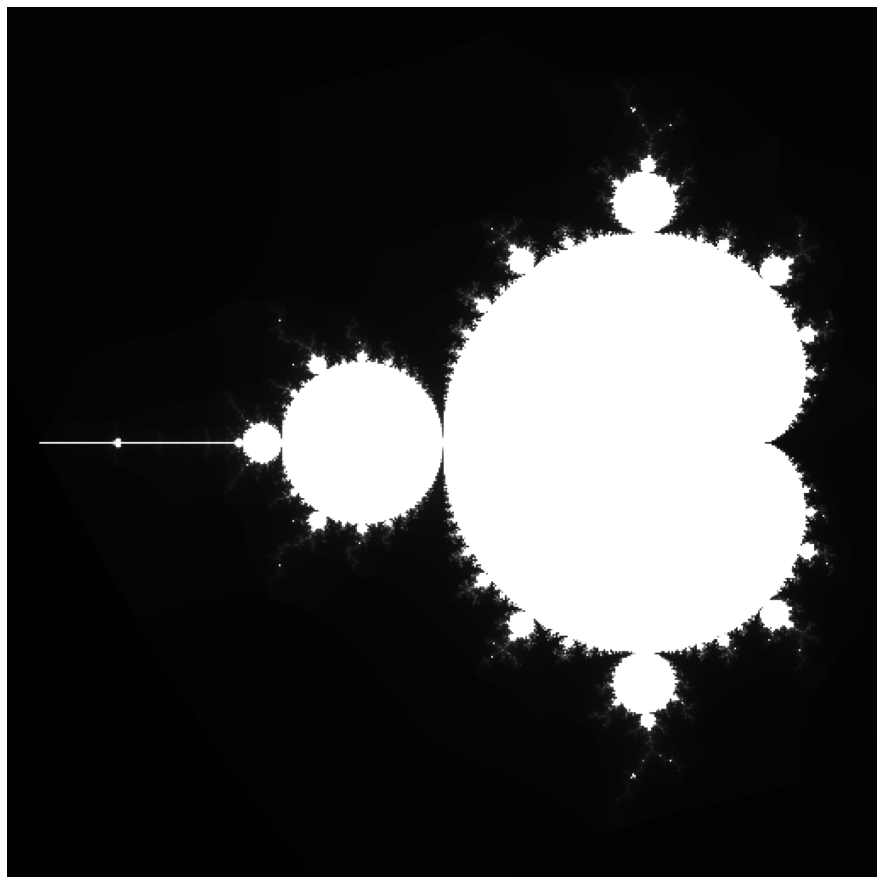

In [108]:
fs = (16, 16)
dim = 512
img = create_blank(dim, dim, (255, 255, 255))
calc = np.zeros((dim, dim))

#reMin = -.751
#reMax = -.749
#imMin = -.025
#imMax = .025
reMin = -2.1
reMax = .6
imMin = -1.35
imMax = 1.35
dRe = (reMax - reMin) / dim
dIm = (imMax - imMin) / dim

step = dim
while (step >= 1):
    for y in range(0, dim, step):
        for x in range(0, dim, step):
            
            if (calc[y][x] == 1):
                color = img[y][x]
            else:
                # calc the current pixel
                re = reMin + x * dRe
                im = imMin + y * dIm
                it, zn = f_n_mbs((re, im), 255, tresh=2)
                b = it
                g = b
                r = b
                color = (g, b, r)
                #r = max(255, zn / 100000)
                #g = 255 * it / 1000
                #b = max(255, r * g)
                #color = (b, g, r)
                img[y][x] = color
                calc[y][x] = 1
            
            # fill the empty pixels
            for xi in range(x, x + step):
                for yi in range(y, y + step):
                    img[yi][xi] = color
    
    step = step // 2
    
    # update image
    clear_output(wait=True)
    plt.figure(figsize=fs)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show();

In [100]:
#cv2.imwrite('mandelbrot_5.png',img)

## Julia Set

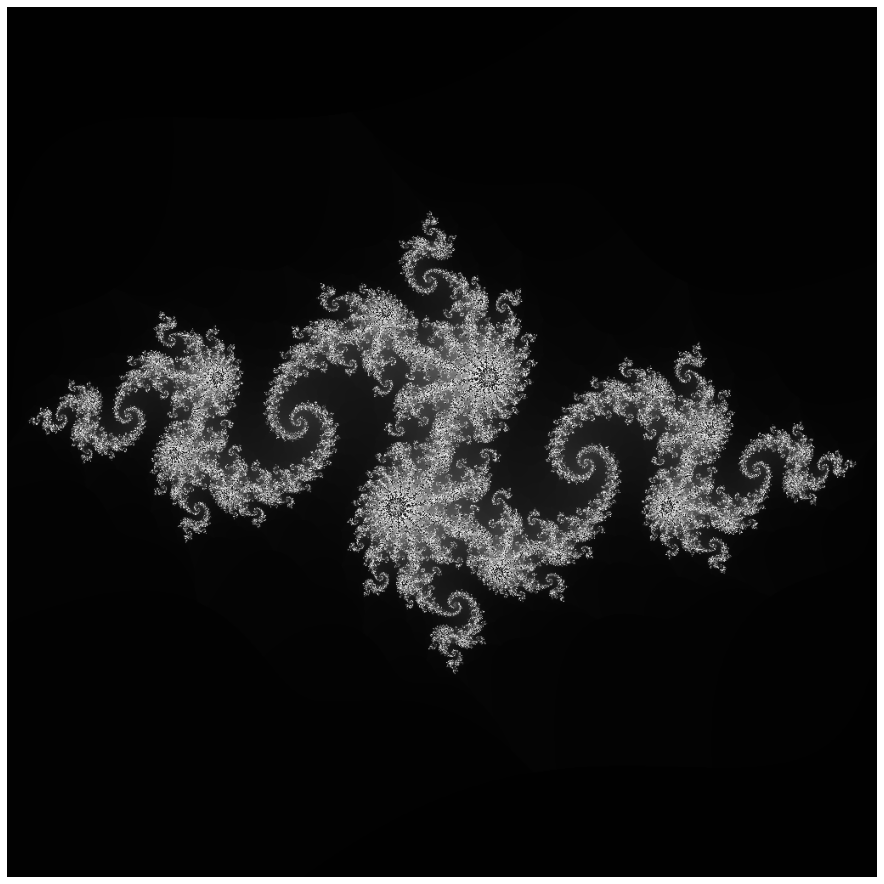

In [157]:
fs = (16, 16)
dim = 1024
img = create_blank(dim, dim, (255, 255, 255))
calc = np.zeros((dim, dim))

reMin = -1.6
reMax = 1.6
imMin = -1.6
imMax = 1.6
dRe = (reMax - reMin) / dim
dIm = (imMax - imMin) / dim



c = (-0.8, -0.156)

step = dim
while (step >= 1):
    for y in range(0, dim, step):
        for x in range(0, dim, step):
            
            if (calc[y][x] == 1):
                color = img[y][x]
            else:
                # calc the current pixel
                re = reMin + x * dRe
                im = imMin + y * dIm
                it, zn = f_n_js((re, im), c, n = 1000, tresh=3)
                b = it
                g = b
                r = b
                color = (g, b, r)
                #r = max(255, zn / 100000)
                #g = 255 * it / 1000
                #b = max(255, r * g)
                #color = (b, g, r)
                img[y][x] = color
                calc[y][x] = 1
            
            # fill the empty pixels
            for xi in range(x, x + step):
                for yi in range(y, y + step):
                    img[yi][xi] = color
    
    step = step // 2
    
    # update image
    clear_output(wait=True)
    plt.figure(figsize=fs)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show();

In [161]:
fs = (8, 8)
dim = 256

reMin = -1.6
reMax = 1.6
imMin = -1.6
imMax = 1.6
dRe = (reMax - reMin) / dim
dIm = (imMax - imMin) / dim


for cx in range(-100, 101, 1):
    
    cx = cx / 100
    
    for cy in range(-100, 101, 1):

        img = create_blank(dim, dim, (255, 255, 255))
        calc = np.zeros((dim, dim))
        cy = cy / 100
        c = (cx, cy)

        step = dim
        while (step >= 1):
            for y in range(0, dim, step):
                for x in range(0, dim, step):
            
                    if (calc[y][x] == 1):
                        color = img[y][x]
                    else:
                        # calc the current pixel
                        re = reMin + x * dRe
                        im = imMin + y * dIm
                        it, zn = f_n_js((re, im), c, n = 1000, tresh=3)
                        b = it
                        g = b
                        r = b
                        color = (g, b, r)
                        #r = max(255, zn / 100000)
                        #g = 255 * it / 1000
                        #b = max(255, r * g)
                        #color = (b, g, r)
                        img[y][x] = color
                        calc[y][x] = 1
            
                    # fill the empty pixels
                    for xi in range(x, x + step):
                        for yi in range(y, y + step):
                            img[yi][xi] = color
    
            step = step // 2
    
            # update image
            clear_output(wait=True)
            plt.figure(figsize=fs)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.show();
            print(c)
            
        cv2.imwrite(f'Julia/julia_{cx:.3f}_{cy:.3f}i.png',img)

KeyboardInterrupt: 